In [99]:
from langchain_huggingface import HuggingFaceEmbeddings
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [100]:
embedding = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')

In [101]:
documents = [
    "The sun is the center of our solar system and provides energy to all planets.",
    "Lionel Messi scored a hat-trick in yesterday’s football match.",
    "Machine learning is a subset of artificial intelligence that uses data to learn patterns.",
    "The Eiffel Tower is one of the most famous landmarks in Paris, France.",
    "Python is a versatile programming language used in data science and web development.",
    "A healthy diet includes fruits, vegetables, and regular exercise.",
    "The stock market showed a significant rise in tech stocks this morning.",
    "Mount Everest is the highest peak in the world and attracts climbers globally.",
    "The COVID-19 pandemic changed how people work, with remote jobs becoming common.",
    "The Grand Canyon in the USA is known for its immense size and layered red rocks.",
    "ChatGPT can assist in generating content, answering questions, and even writing code.",
    "Barcelona is a beautiful city in Spain known for its art and architecture.",
    "Electric cars are becoming more popular due to environmental concerns.",
    "NASA’s new telescope can detect galaxies formed billions of years ago.",
    "The local bakery just launched a new sourdough recipe that’s a big hit.",
    "Bitcoin is a decentralized cryptocurrency based on blockchain technology.",
    "Cats are independent animals but often form strong bonds with their owners.",
    "Cybersecurity is essential for protecting digital data and user privacy.",
    "A short nap during the day can improve memory and focus.",
    "Cloud computing allows users to access services over the internet instead of local servers."
]

In [102]:
doc_vector = embedding.embed_documents(documents) 

In [103]:
query = "Artificial intelligence helps computers learn from data to make decisions."
query_vector = embedding.embed_query(query)

In [104]:
sim = cosine_similarity([query_vector],doc_vector)

In [105]:
top_2 = np.argsort(sim[0])[::-1][:2]

In [106]:
print('query:', query)
print('similar docs:')
for i in top_2:
    print(documents[i])

query: Artificial intelligence helps computers learn from data to make decisions.
similar docs:
Machine learning is a subset of artificial intelligence that uses data to learn patterns.
Cybersecurity is essential for protecting digital data and user privacy.


In [113]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=2)

combined_vectors = np.vstack([query_vector, doc_vector])
dim_red = tsne.fit_transform(combined_vectors)

In [143]:
print(dim_red.max(axis=0))  
print(dim_red.min(axis=0))

[103.31996  97.84136]
[ -73.687645 -120.65592 ]


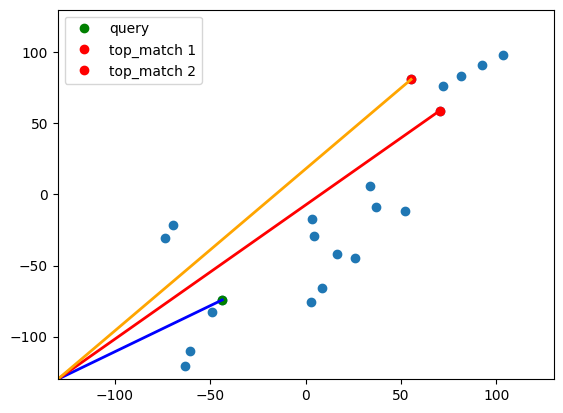

In [153]:
import matplotlib.pyplot as plt
plt.xlim(-130,130)
plt.ylim(-130,130)
plt.plot(dim_red[:,0],dim_red[:,1],'o')
plt.plot(dim_red[-1,0],dim_red[-1,1],'o',color='Green',label='query')
plt.plot([-130, dim_red[-1, 0]], [-130, dim_red[-1, 1]], color='blue', linewidth=2)
colors = ['red','orange']
for i,k in enumerate(top_2):
    plt.plot(dim_red[k,0],dim_red[k,1],'o',color='red',label=f'top_match {i+1}')
    plt.plot([-130, dim_red[k, 0]], [-130, dim_red[k, 1]], color=colors[i], linewidth=2)
plt.legend()